In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

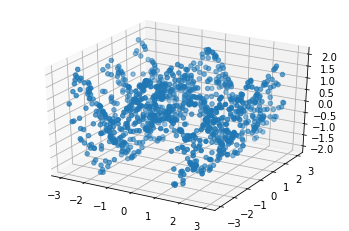

In [3]:
# We make the dataset

N = 1000
X = np.random.random((N, 2)) * 6 -3 # uniform distribution in [-3, 3]
y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

In [0]:
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [0]:
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [8]:
def train_model(model, Loss, optimizer, X_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)
    for iteration in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = Loss(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses[iteration] = loss.item()
        if (iteration+1) % 50 == 0:
            print("Epoch: {}/{}, Train Loss: {}".format(iteration+1, epochs, loss.item()))

    return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))
train_losses = train_model(model, Loss, optimizer, X_train, y_train)

Epoch: 50/1000, Train Loss: 0.33179178833961487
Epoch: 100/1000, Train Loss: 0.19603821635246277
Epoch: 150/1000, Train Loss: 0.10034696757793427
Epoch: 200/1000, Train Loss: 0.054421719163656235
Epoch: 250/1000, Train Loss: 0.028903843834996223
Epoch: 300/1000, Train Loss: 0.019135210663080215
Epoch: 350/1000, Train Loss: 0.010073184035718441
Epoch: 400/1000, Train Loss: 0.006833069492131472
Epoch: 450/1000, Train Loss: 0.006573825608938932
Epoch: 500/1000, Train Loss: 0.004556342959403992
Epoch: 550/1000, Train Loss: 0.0038994024507701397
Epoch: 600/1000, Train Loss: 0.004372540395706892
Epoch: 650/1000, Train Loss: 0.0030949977226555347
Epoch: 700/1000, Train Loss: 0.0028950325213372707
Epoch: 750/1000, Train Loss: 0.0026878134813159704
Epoch: 800/1000, Train Loss: 0.021574677899479866
Epoch: 850/1000, Train Loss: 0.0025476734153926373
Epoch: 900/1000, Train Loss: 0.002391195623204112
Epoch: 950/1000, Train Loss: 0.0027221294585615396
Epoch: 1000/1000, Train Loss: 0.0022636859212070

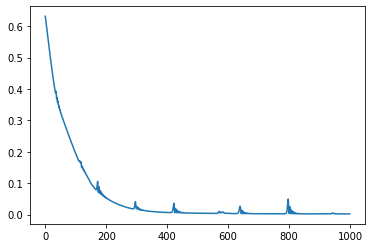

In [9]:
plt.plot(train_losses)

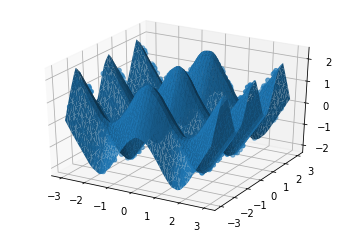

In [11]:
#Plot the predicted surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()

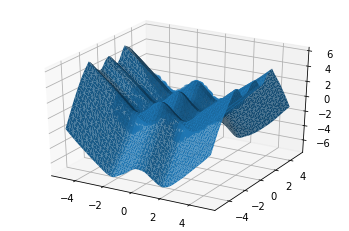

In [12]:
#Test interpolation 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

with torch.no_grad():
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()